In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':15})

# Choosing a function

## Overview:


**Questions**
- How do I choose a function to fit?

**Objectives**
- Choose and define a function to fit

## How do I choose a function to fit?

Sometimes we already have an idea of the function that we want to fit to our data. For the BoltData we know that $t = d/v$ so we know that we just want a linear relation between distance and time. But what about when we don't already know how the variables are related?

This is not unusual - this is science! Often we **don't** already know how different observed variables are related because that's what we're trying to find out. So where do we start?

## Look at your data!

The first thing you should always do is **make a plot**. Have a look at your data - does it look like a linear relationship? Does it look exponential or perhaps sinusoidal? 

For this section we're going to use some data on Cepheid variable stars. If you've not come across Cepheids before, they are stars that change in brightness over time. The dataset we're using here is a sample of Cepheids in our nearest galaxy, the Large Magellanic Cloud.


Download the [LMC_Cepheids.csv](../data/LMC_Cepheids.csv) file and read it in to a `pandas` dataframe. I'm calling mine `lmc_df`. Have a look at the data

In [2]:
lmc_df = pd.read_csv('../data/LMC_Cepheids.csv')

In [3]:
lmc_df.head()

,star_ID,period,mag_1,err_mag_1,mag_2,err_mag_2,colour,err_colour
0,HV00872,29.820,11.320,0.005,11.381,0.005,-0.061,0.002
1,HV00873,34.426,10.872,0.006,10.903,0.006,-0.029,0.002
2,HV00875,30.338,11.094,0.003,11.077,0.003,0.016,0.001
3,HV00876,22.716,11.558,0.006,11.592,0.007,-0.033,0.002
4,HV00877,45.155,10.701,0.004,10.790,0.004,-0.089,0.002


You should have a dataframe with 85 rows and 8 columns. The columns are:
- `star_ID` - Name of the star
- `period` - the period of the star's changes in brightness
- `mag_1` and `mag_2` - the apparent magnitude of the star at two different wavelengths. Here `mag_1` corresponds to $\lambda = 3.6 \mu\text{m}$ and `mag_2` is $\lambda = 4.5 \mu\text{m}$. 
- `err_mag_1` and `err_mag_2` - uncertainties on the two magnitudes
- `colour` - the star's colour; here it's defined as `mag_1 - mag_2`
- `err_colour` - the uncertainty on the colour.

The periods are given in days and magnitudes, colours and their respective uncertainties are all given in units of magnitudes.

## Information: Magnitudes

Magnitudes are ~~stupid~~ a weird system that was defined by the ancient Greeks. You'll come across them soon in this semester's astro unit. They're defined that lower numbers correspond to brighter stars, so a star with $M = -5 \text{ mag}$ is brighter than a star with $M=5\text{ mag}$.

Magnitudes are related to flux by the relation

$$ M = - 2.5 \log_{10}\left(\dfrac{F}{F_0}\right) $$

where $F$ is the flux of the star and $F_0$ is a the flux of a reference star (usually Vega).

One of the cool things about Cepheids is that they pulsate. They're basically really big simple harmonic oscillators. The period we measure is the period of those pulsations. The really intersting thing is that their period is related to their intrinsic brightness. So let's have a look at that.

## Exercise: Make a plot of `period` and `mag_1`

Make a plot of `mag_1` as a function of `period`. Make sure your plot has appropriate axis labels, units etc.

What does the relation look like? 

[solution]()

## Solution+: Make a plot of `period` and `mag_1`


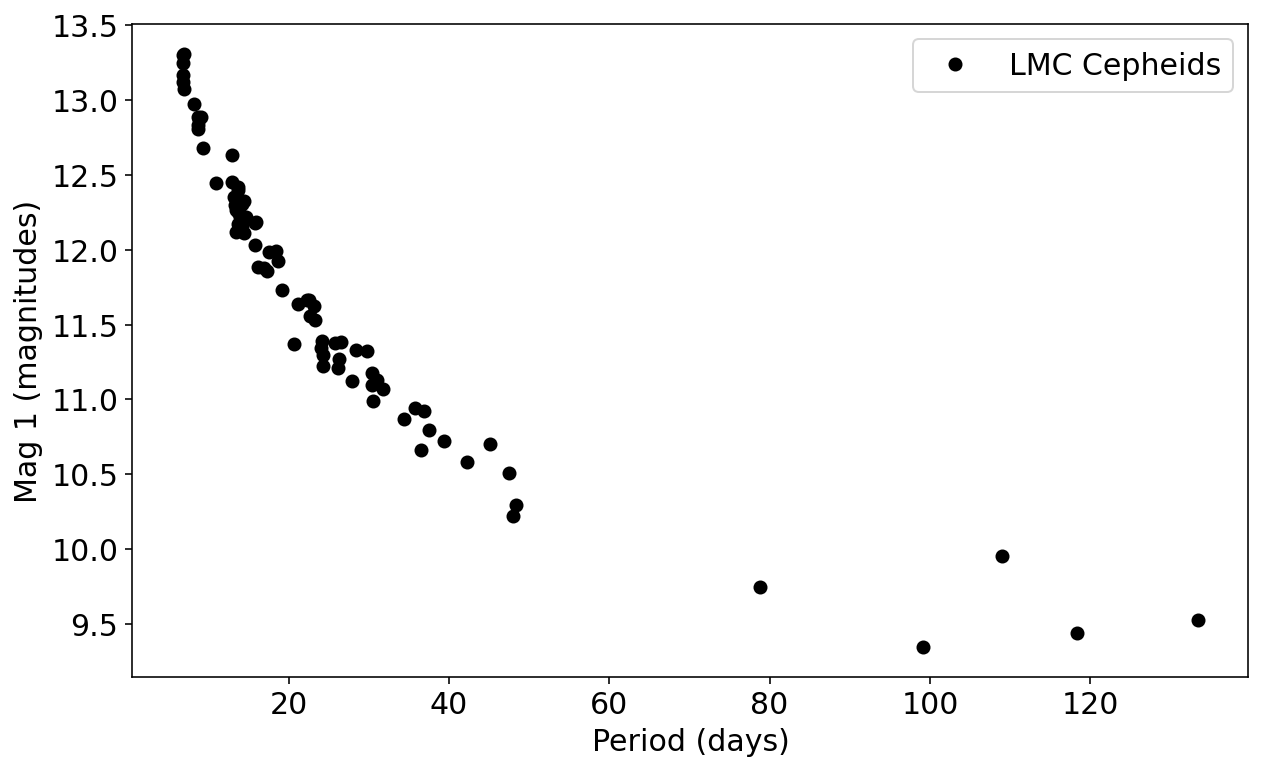

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(lmc_df['period'], lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')
ax.set_xlabel('Period (days)')
ax.set_ylabel('Mag 1 (magnitudes)')
ax.legend()
#plt.savefig('../images/lmc_plot_1.png', dpi=300)


:solution+

You should end up with a plot that looks something like this:

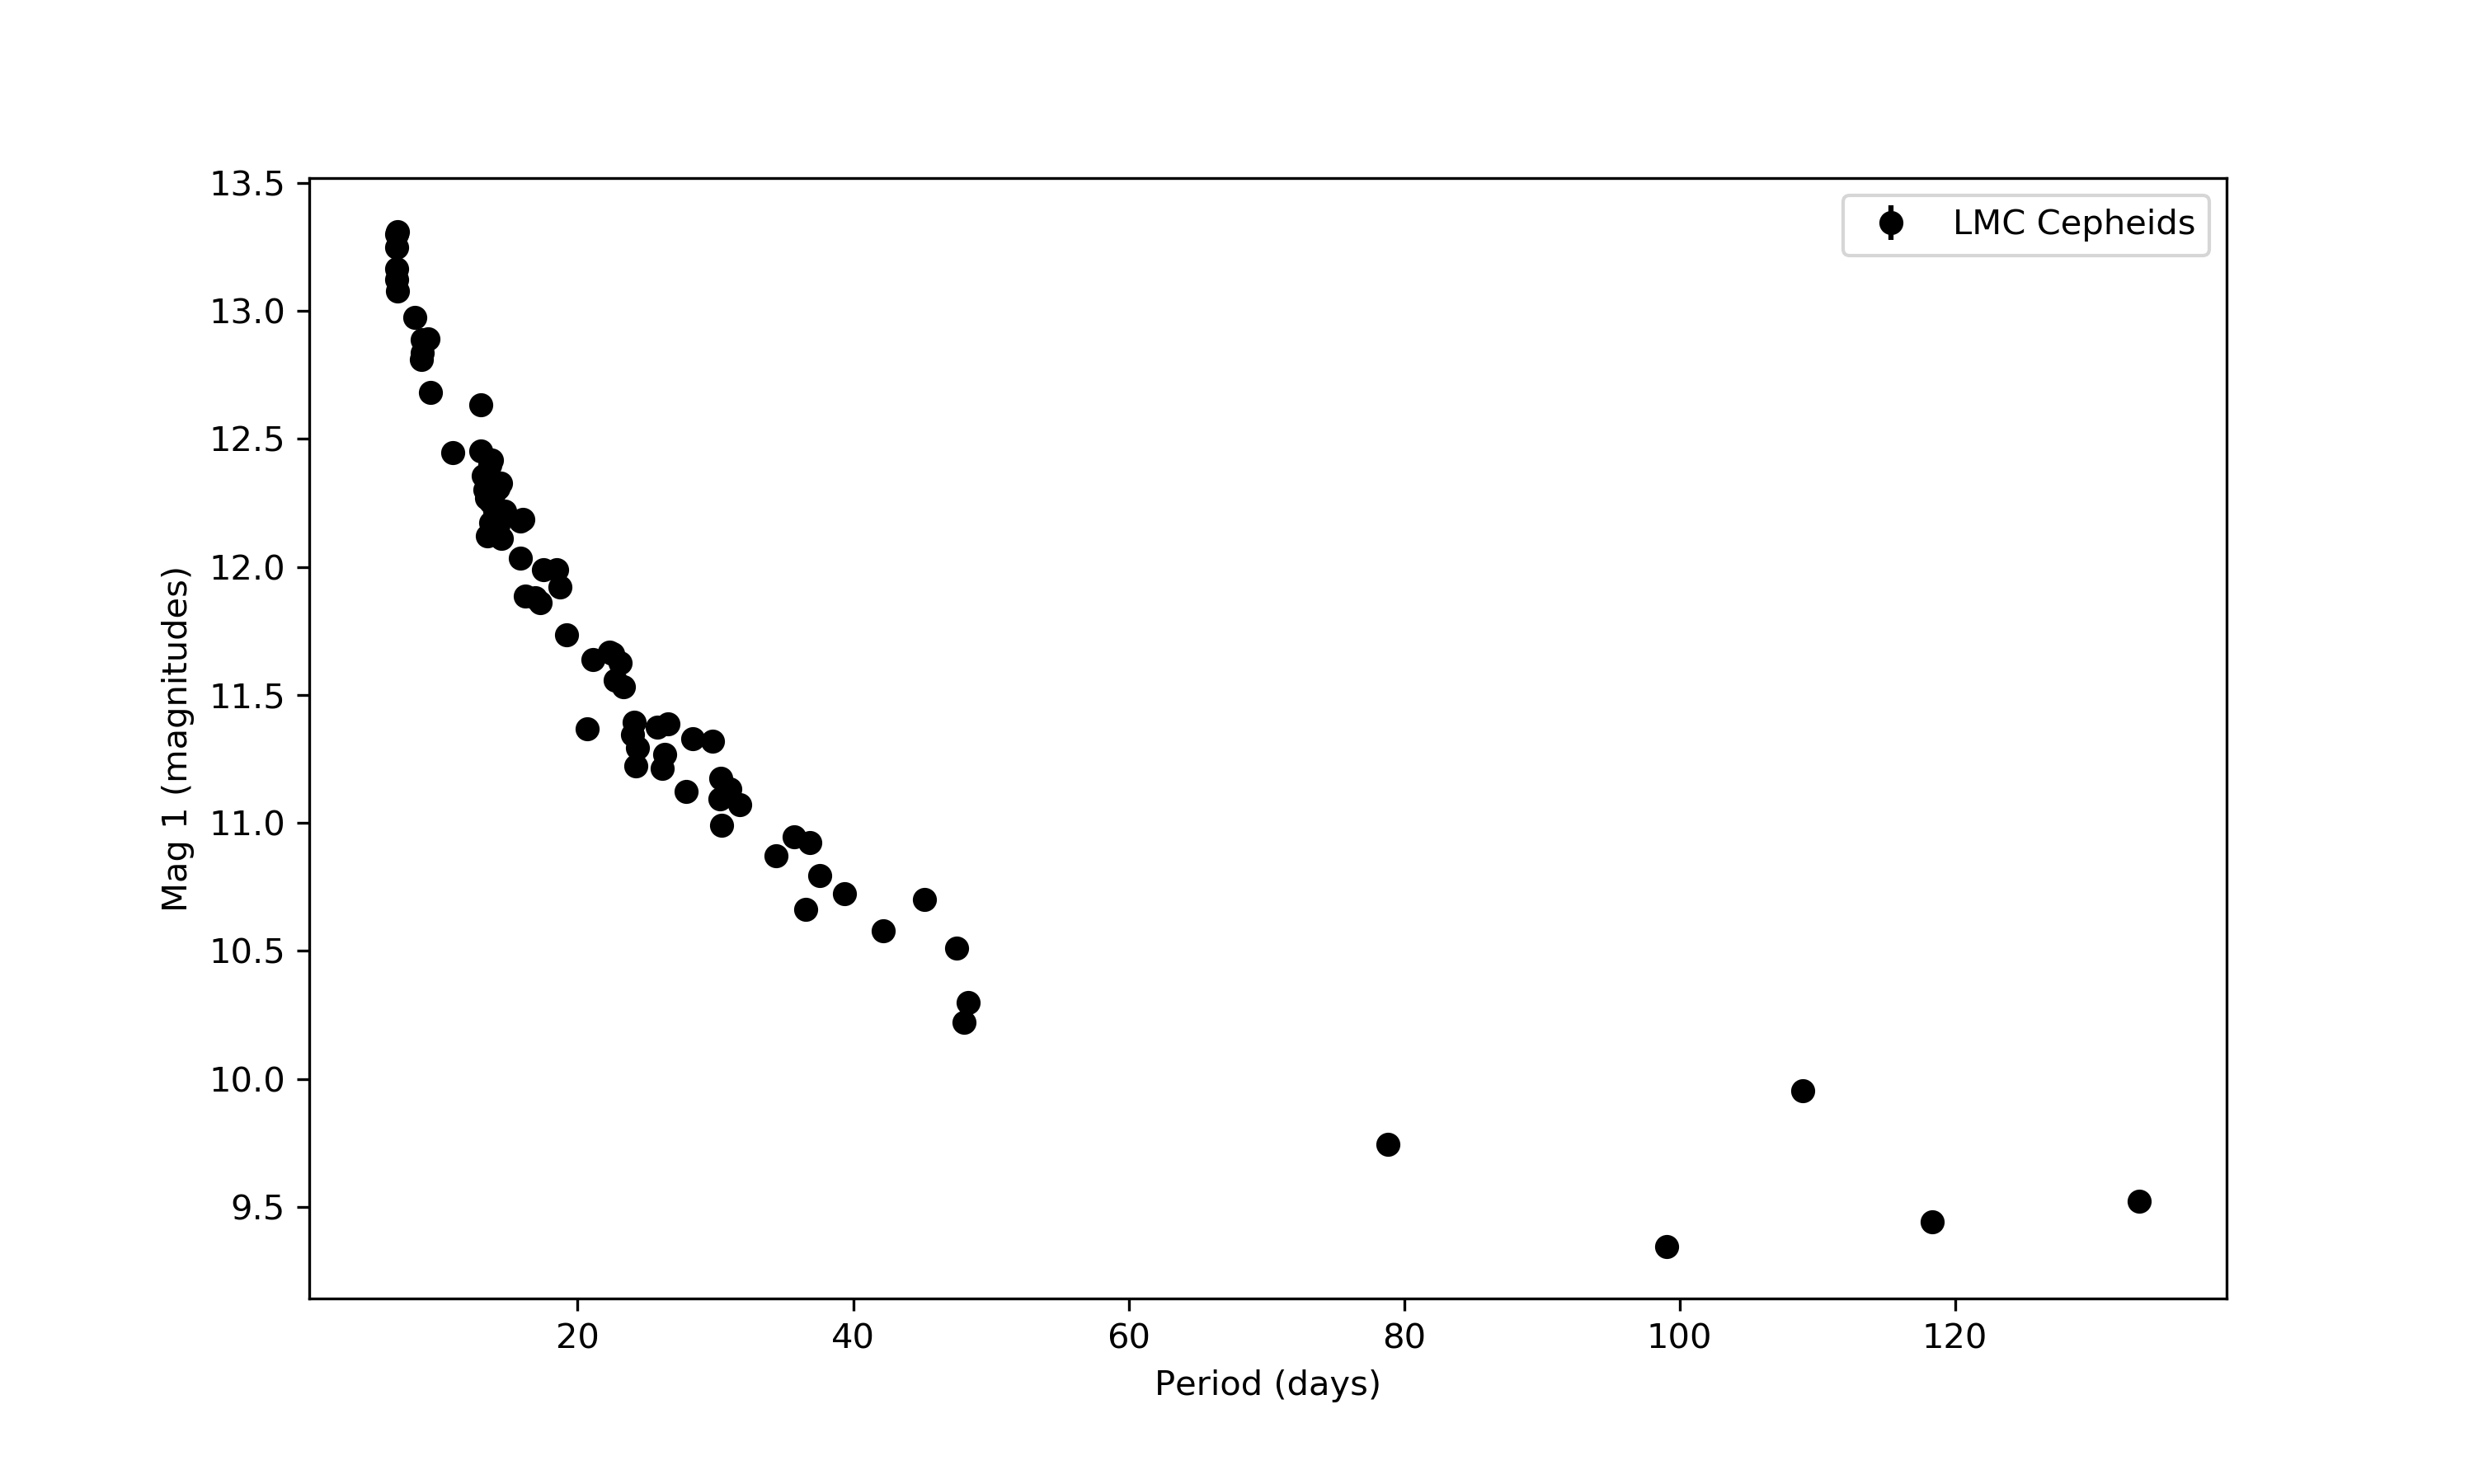

The first thing we need to do to this plot is to change the `y` axis to go in the opposite direction. As described in the information box further up this page, magnitudes are backwards. 

We can switch the direction of the `y` axis using `invert_yaxis`. This is where calling setting up our plot with 
```py
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
```
rather than just using `plt.plot` comes in handy. 

We don't need to go back and edit all our code. We can just use `ax.invert_yaxis()` to flip the axis and call `fig` to display our updated figure.

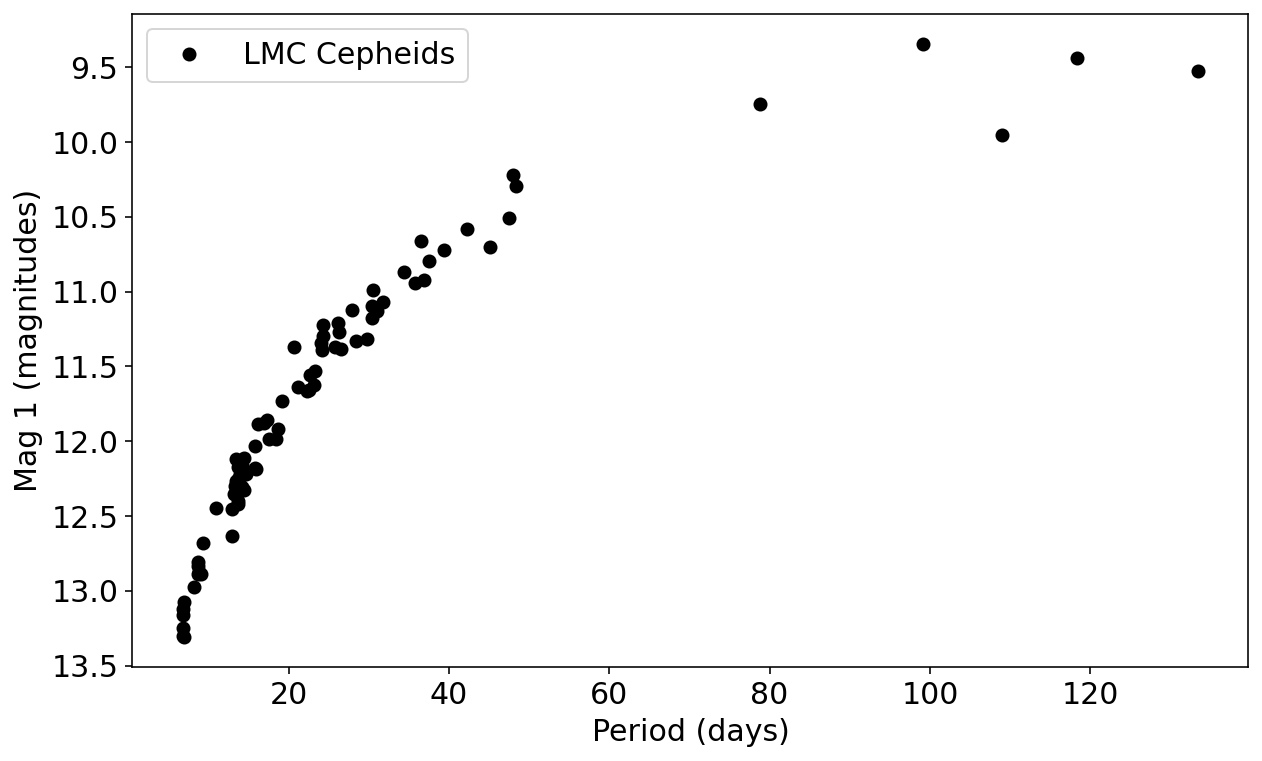

In [5]:
ax.invert_yaxis()
fig

Now we can start to think about the type of function we should use to fit the data. The brightness is increasing as a function of period but it doesn't look to be a linear relation.

Remember the relation between magnitude and flux given earlier: $M \propto - \log_{10} F$. So that's a good place to start. We'll try a function of the form

$$
M = a \log_{10} P + b
$$

When we define our function we want it to return $M$, using $P$ as the input data and find the values of $a$ and $b$:


In [6]:
def log_p_mag(p, a, b):
    mag = a * np.log10(p) + b
    return(mag)

We can now use `curve_fit` to find the best values of `a` and `b`

**Update 12/3/21: In the original version of these notes I forgot to square root the values from the covariance matrix to get the uncertainties. This is fixed now.**

In [7]:
popt, pcov = curve_fit(log_p_mag, lmc_df['period'], lmc_df['mag_1'])

a = popt[0]
b = popt[1]

err_a = np.sqrt(pcov[0][0])
err_b = np.sqrt(pcov[1][1])

print("a = {0:.3f} +/- {1:.3f}".format(a, err_a))
print("b = {0:.3f} +/- {1:.3f}".format(b, err_b))

a = -3.145 +/- 0.052
b = 15.817 +/- 0.069


And of course we should make a plot and see how well it fits

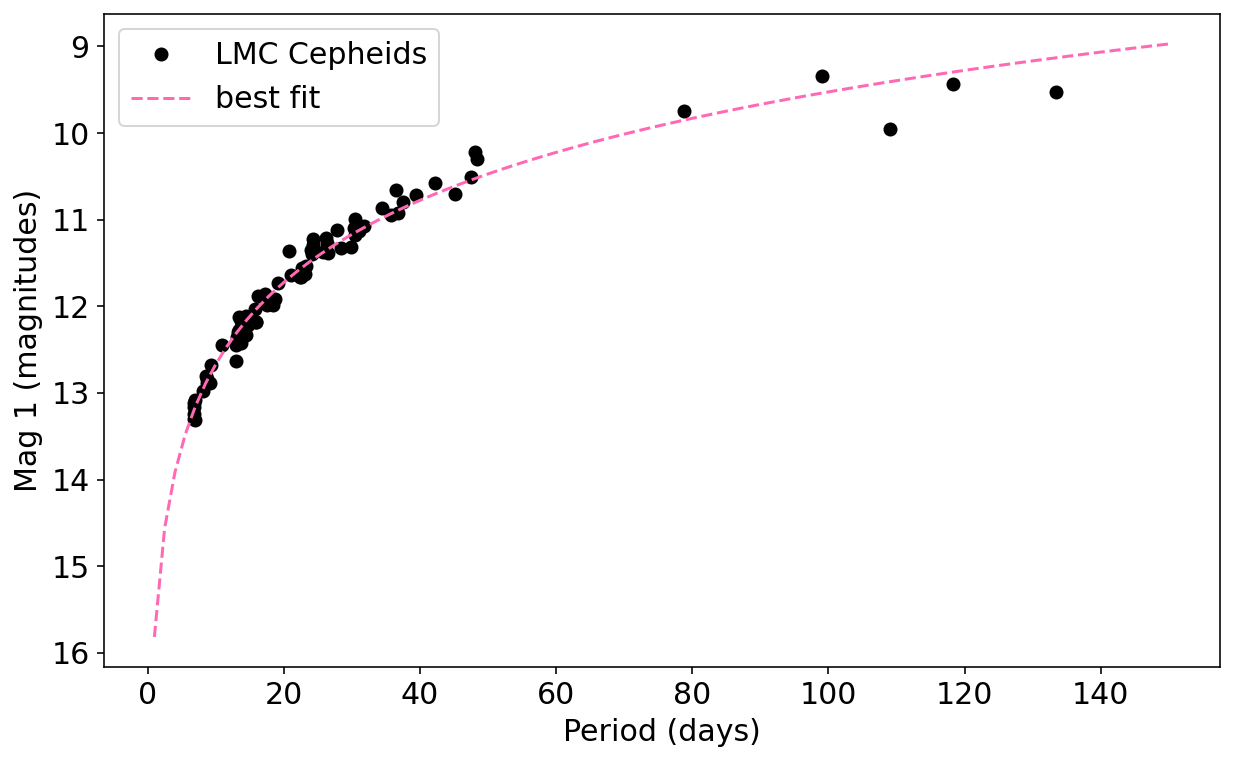

In [8]:
fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1,1,1)

ax2.plot(lmc_df['period'], lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')

p = np.linspace(1, 150, 100)

ax2.plot(p, log_p_mag(p, a, b), color='hotpink', ls='--', label='best fit')

ax2.set_xlabel('Period (days)')
ax2.set_ylabel('Mag 1 (magnitudes)')
ax2.legend()
ax2.invert_yaxis()
plt.show()



You may have noticed in the cell above I defined a new variable, `p = np.linspace(1, 150, 100)`. I can't just use the `lmc_df['period']` values as the `x` values to plot the line as they're not in order of increasing or decreasing period. `plt.plot` plots the data in the order it sees it, so here the line would go all over the place. By using the `p` variable as the `x` values instead we get what we want - a nice line that shows the relation.

While this plot looks OK, we can change a couple of things to make it more convincing. 

Look at where the points fall along the x-axis. They aren't evenly spaced, there's lots on the left hand side and fewer as we go to longer periods. Now we know that $M \propto \log_{10} P$ we can re-plot the data to take that into account

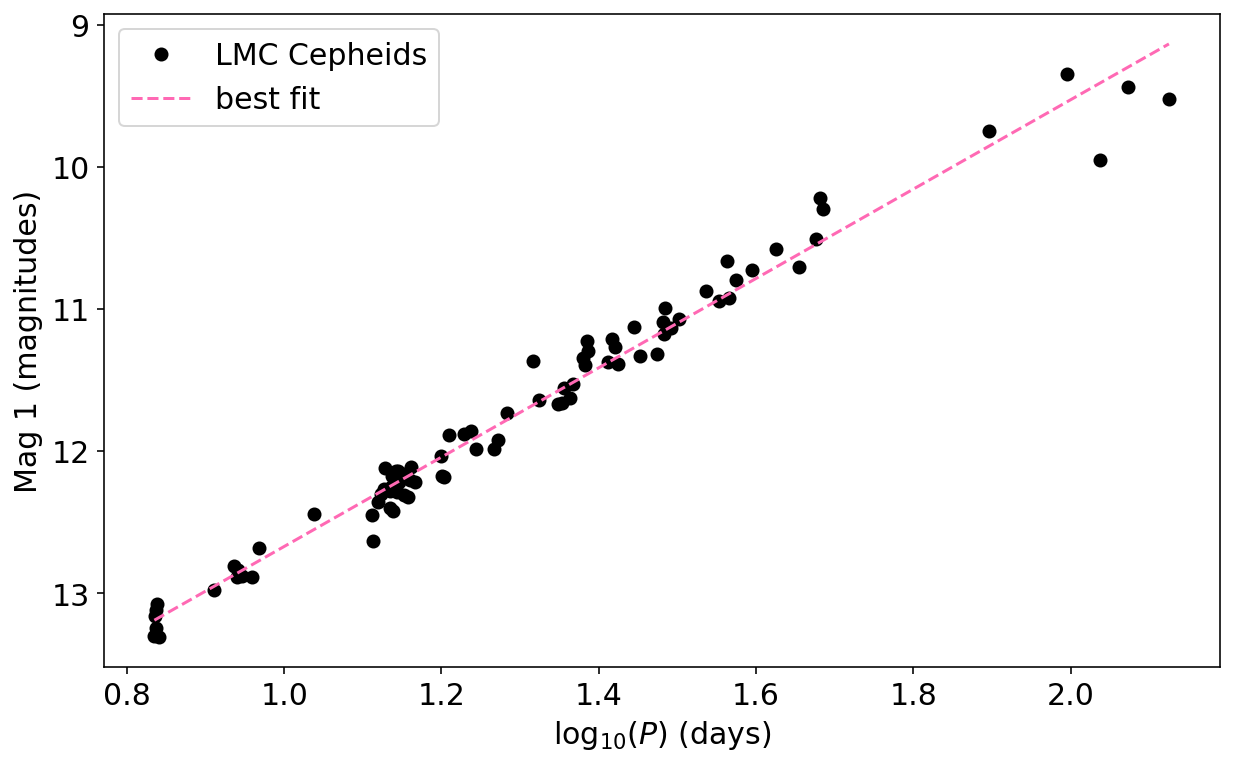

In [9]:
fig3 = plt.figure(figsize=(10,6))
ax3 = fig3.add_subplot(1,1,1)

ax3.plot(np.log10(lmc_df['period']), lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')

p = np.linspace(lmc_df['period'].min(), lmc_df['period'].max(), 100)

ax3.plot(np.log10(p), log_p_mag(p, a, b), color='hotpink', ls='--', label='best fit')

ax3.set_xlabel('$\log_{10}(P)$ (days)')
ax3.set_ylabel('Mag 1 (magnitudes)')
ax3.legend()
ax3.invert_yaxis()
plt.show()



This is a much more convincing plot! We can see the details more clearly now the values are more spaced out along the x-axis.

## Key Points:
- The best way to decide what kind of function you should fit is to look at your data.
- You don't have to stick with the original data - if it makes more sense to fit e.g. $\log_{10} x$ rather than $x$ then that's perfectly fine! Just make sure to write down what you're doing. 